# Single-cell RNA-seq imputation using DeepImpute

Here is a comprehensive tutorial to understand the functionnalities of DeepImpute.

In [13]:
from deepimpute.multinet import MultiNet
import pandas as pd

# Load dataset using pandas
data = pd.read_csv('test.csv',index_col=0)
print('Working on {} cells and {} genes'.format(*data.shape))

Working on 500 cells and 3000 genes


In [14]:
data

,ENSG00000177954,ENSG00000197756,ENSG00000231500,ENSG00000140988,ENSG00000105372,ENSG00000198712,ENSG00000109475,ENSG00000112306,ENSG00000137818,ENSG00000115268,...,ENSG00000269858,ENSG00000182087,ENSG00000160214,ENSG00000166411,ENSG00000186153,ENSG00000089351,ENSG00000108433,ENSG00000206053,ENSG00000137806,ENSG00000197766
AATTGTGACTACGA-1,826.0,674.0,694.0,809.0,771.0,796.0,755.0,684.0,597.0,516.0,...,3.0,2.0,3.0,2.0,2.0,0.0,0.0,1.0,5.0,4.0
TGACACGATTCGTT-1,617.0,618.0,594.0,703.0,671.0,473.0,549.0,523.0,476.0,527.0,...,2.0,1.0,2.0,2.0,3.0,3.0,1.0,4.0,2.0,3.0
TGTCAGGATTGTCT-1,525.0,550.0,540.0,546.0,615.0,565.0,263.0,422.0,449.0,518.0,...,2.0,1.0,0.0,3.0,1.0,2.0,3.0,2.0,2.0,1.0
TAAGTAACGTTCTT-1,514.0,474.0,361.0,331.0,447.0,279.0,188.0,332.0,379.0,380.0,...,1.0,2.0,0.0,3.0,3.0,0.0,1.0,0.0,3.0,1.0
TCCTAAACTTCATC-1,444.0,507.0,509.0,566.0,520.0,246.0,352.0,413.0,381.0,481.0,...,1.0,2.0,0.0,5.0,4.0,0.0,3.0,4.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AAATGGGATGCCTC-1,169.0,149.0,161.0,203.0,178.0,155.0,128.0,150.0,124.0,120.0,...,0.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
TAAAGTTGTTACCT-1,202.0,216.0,177.0,253.0,257.0,34.0,38.0,188.0,137.0,189.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0,1.0
AGCGAACTCTAGTG-1,160.0,154.0,184.0,253.0,150.0,190.0,101.0,191.0,158.0,127.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,2.0
GTCACCTGTTACCT-1,140.0,133.0,179.0,246.0,197.0,89.0,88.0,150.0,153.0,132.0,...,2.0,1.0,1.0,3.0,1.0,0.0,0.0,0.0,3.0,1.0


## Create a DeepImpute multinet

In [15]:
# Using default parameters
multinet = MultiNet() 

Using all the cores (8)


In [16]:
# Using custom parameters
NN_params = {
        'learning_rate': 1e-4,
        'batch_size': 64,
        'max_epochs': 200,
        'ncores': 5,
        'sub_outputdim': 512,
        'architecture': [
            {"type": "dense", "activation": "relu", "neurons": 200},
            {"type": "dropout", "activation": "dropout", "rate": 0.3}]
    }

multinet = MultiNet(**NN_params)

## Fit the networks

In [17]:
# Using all the data
multinet.fit(data,cell_subset=1,minVMR=0.5)

Input dataset is 500 cells (rows) and 3000 genes (columns)
First 3 rows and columns:
                  ENSG00000177954  ENSG00000197756  ENSG00000231500
AATTGTGACTACGA-1            826.0            674.0            694.0
TGACACGATTCGTT-1            617.0            618.0            594.0
TGTCAGGATTGTCT-1            525.0            550.0            540.0
3072 genes selected for imputation
Net 0: 639 predictors, 512 targets
Net 1: 592 predictors, 512 targets
Net 2: 591 predictors, 512 targets
Net 3: 594 predictors, 512 targets
Net 4: 555 predictors, 512 targets
Net 5: 631 predictors, 512 targets
Normalization
Building network
[{'type': 'dense', 'activation': 'relu', 'neurons': 200}, {'type': 'dropout', 'activation': 'dropout', 'rate': 0.3}]
Fitting with 500 cells
Train on 475 samples, validate on 25 samples
Epoch 1/200
475/475 [==============================] - 2s 4ms/step - loss: 28.9960 - dense_55_loss: 4.3762 - dense_56_loss: 4.7877 - dense_57_loss: 4.6143 - dense_58_loss: 4.9932 - d

Epoch 19/200
475/475 [==============================] - 0s 441us/step - loss: 5.7847 - dense_55_loss: 0.8831 - dense_56_loss: 1.0441 - dense_57_loss: 0.8502 - dense_58_loss: 1.0587 - dense_59_loss: 1.0211 - dense_60_loss: 0.9274 - val_loss: 2.4417 - val_dense_55_loss: 0.3760 - val_dense_56_loss: 0.4278 - val_dense_57_loss: 0.3783 - val_dense_58_loss: 0.4434 - val_dense_59_loss: 0.4400 - val_dense_60_loss: 0.3762
Epoch 20/200
475/475 [==============================] - 0s 473us/step - loss: 5.5075 - dense_55_loss: 0.8391 - dense_56_loss: 0.9861 - dense_57_loss: 0.8019 - dense_58_loss: 1.0029 - dense_59_loss: 0.9794 - dense_60_loss: 0.8981 - val_loss: 2.4654 - val_dense_55_loss: 0.3853 - val_dense_56_loss: 0.4435 - val_dense_57_loss: 0.3797 - val_dense_58_loss: 0.4492 - val_dense_59_loss: 0.4366 - val_dense_60_loss: 0.3711
Epoch 21/200
475/475 [==============================] - 0s 519us/step - loss: 5.4051 - dense_55_loss: 0.8257 - dense_56_loss: 0.9831 - dense_57_loss: 0.7849 - dense_58_

Epoch 39/200
475/475 [==============================] - 0s 646us/step - loss: 3.7567 - dense_55_loss: 0.5957 - dense_56_loss: 0.6713 - dense_57_loss: 0.5508 - dense_58_loss: 0.6613 - dense_59_loss: 0.6634 - dense_60_loss: 0.6144 - val_loss: 1.8023 - val_dense_55_loss: 0.2814 - val_dense_56_loss: 0.3274 - val_dense_57_loss: 0.2681 - val_dense_58_loss: 0.3023 - val_dense_59_loss: 0.3297 - val_dense_60_loss: 0.2934
Epoch 40/200
475/475 [==============================] - 0s 468us/step - loss: 3.7200 - dense_55_loss: 0.5731 - dense_56_loss: 0.6789 - dense_57_loss: 0.5422 - dense_58_loss: 0.6624 - dense_59_loss: 0.6487 - dense_60_loss: 0.6147 - val_loss: 1.7453 - val_dense_55_loss: 0.2977 - val_dense_56_loss: 0.3045 - val_dense_57_loss: 0.2764 - val_dense_58_loss: 0.2766 - val_dense_59_loss: 0.3113 - val_dense_60_loss: 0.2789
Epoch 41/200
475/475 [==============================] - 0s 452us/step - loss: 3.6704 - dense_55_loss: 0.5717 - dense_56_loss: 0.6647 - dense_57_loss: 0.5341 - dense_58_

Epoch 59/200
475/475 [==============================] - 0s 462us/step - loss: 3.0531 - dense_55_loss: 0.4785 - dense_56_loss: 0.5503 - dense_57_loss: 0.4404 - dense_58_loss: 0.5373 - dense_59_loss: 0.5362 - dense_60_loss: 0.5105 - val_loss: 1.4939 - val_dense_55_loss: 0.2416 - val_dense_56_loss: 0.2707 - val_dense_57_loss: 0.2211 - val_dense_58_loss: 0.2479 - val_dense_59_loss: 0.2715 - val_dense_60_loss: 0.2411
Epoch 60/200
475/475 [==============================] - 0s 464us/step - loss: 3.0467 - dense_55_loss: 0.4809 - dense_56_loss: 0.5459 - dense_57_loss: 0.4466 - dense_58_loss: 0.5263 - dense_59_loss: 0.5299 - dense_60_loss: 0.5171 - val_loss: 1.5905 - val_dense_55_loss: 0.2546 - val_dense_56_loss: 0.2758 - val_dense_57_loss: 0.2614 - val_dense_58_loss: 0.2687 - val_dense_59_loss: 0.2739 - val_dense_60_loss: 0.2561
Epoch 61/200
475/475 [==============================] - 0s 787us/step - loss: 3.0296 - dense_55_loss: 0.4812 - dense_56_loss: 0.5374 - dense_57_loss: 0.4471 - dense_58_

In [18]:
# Using 80% of the data
#multinet.fit(data,cell_subset=0.5)

In [19]:
# Using 200 cells (randomly selected)
#multinet.fit(data,cell_subset=200)

In [20]:
# Custom fit
#trainingData = data.iloc[100:250,:]
#multinet.fit(trainingData)

## Imputation

The imputation can be done on any dataset as long as the gene labels are the same

In [21]:
imputedData = multinet.predict(data)

Filling zeros


## Visualization

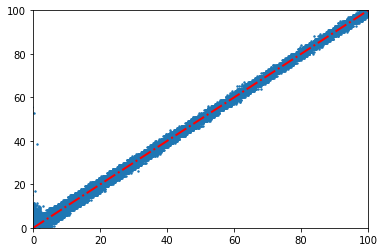

In [22]:
import matplotlib.pyplot as plt
import numpy as np

limits = [0,100]

fig,ax = plt.subplots()

jitter = np.random.normal(0,1,data.size) # Add some jittering to better see the point density
ax.scatter(data.values.flatten()+jitter,imputedData.values.flatten(),s=2)
ax.plot(limits,limits,'r-.',linewidth=2)
ax.set_xlim(limits)
ax.set_ylim(limits)

plt.show()


## Scoring
Display training metrics (MSE and Pearson's correlation on the test data)

In [24]:
multinet.test_metrics

{'correlation': 0.8970452429469788, 'MSE': 0.1793925317008187}